***Предисловие***

Данный проект состоит из двух частей: приоритизации гиоптез и анализа A/B теста. 

В первой части необходимо будет проверить, какие из имеющихся гипотез являются наиболее приоритетными с помощью двух методов ICE и RICE. Для этого у нас имеются все данные, к которым нужно будет применить формулы для подсчета коэффициентов ICE и RICE

Во второй части будет проведен анализ A/B теста. Для данного анализа будут использованы две таблицы с данными по заказам и по посетителям. 

Перед началом анализа импортируем все необходимые библиотеки

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import datetime as dt
import numpy as np

# Приоритизация гипотез

## ICE

In [15]:
hypotheses['ICE']= round(hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Efforts'], 2)

display(hypotheses.sort_values(by='ICE', ascending=False))
pd.options.display.max_colwidth = 130

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


При использовании ICE, приоритезация гипотез изменилась. На первое место встала гипотеза под номером 8 (Запустить акцию, дающую скидку на товар в день рождения), на втором месте гипотеза под номером 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей), а на третьем - под 7 номером (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок). 

## RICE


In [16]:
hypotheses['RICE']= round(hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Efforts'], 2)

display(hypotheses.sort_values(by='RICE', ascending=False))
pd.options.display.max_colwidth = 130

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


При использовании RICE, распределение гипотез немного сменилось, на втором месте теперь находится гипотеза под номером 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), на второе место поднялась гипотеза под номером 2 (Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа). Это произошло благодаря принятию во внимание еще одного показателя - охвата. А на третьем месте оказалась гипотеза под номером 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	).

# Часть два

## Выгрузка данных

In [17]:
orders = pd.read_csv('/datasets/orders.csv')

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors = pd.read_csv('/datasets/visitors.csv')

visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


print(orders.head())

print(visitors.head()) 

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


In [18]:
print(orders.duplicated().value_counts())

print(visitors.duplicated().value_counts())

False    1197
dtype: int64
False    62
dtype: int64


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Дубликатов не обнаружено. По информации о таблицах с данными, пропусков в данных нет.

In [21]:
print('Начало интервала для исследования:',orders['date'].min())
print('Конец интервала для исследования:',orders['date'].max())

Начало интервала для исследования: 2019-08-01 00:00:00
Конец интервала для исследования: 2019-08-31 00:00:00


In [22]:
cnt_visitors_by_group = orders.pivot_table(index='group', values='visitorId', aggfunc='count')
cnt_visitors_by_group

,visitorId
group,
A,557
B,640


В тесте у нас две группы. И в группе B у нас 640 посетителей, а в группе А 557

## Кумулятивная выручка по группам 

In [23]:
data = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

ordersAggr = data.apply(lambda x: orders[np.logical_and(x['date'] >= orders['date'], x['group']==orders['group'])]\
.agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), axis = 1).\
sort_values(by=['date','group'])

ordersAggr.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

visitorsAggr = data.apply(lambda x: visitors[np.logical_and(x['date'] >= visitors['date'], x['group']==visitors['group'])]\
.agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis = 1).sort_values(by=['date','group'])

cummulativeData = ordersAggr.merge(visitorsAggr, left_on=['date', 'group'], right_on=['date', 'group'])

In [24]:
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Подготовили кумулятивную таблицу, соединив данные из orders и visitors, в которую вошли дата, группа (А/В), кол-во покупателей, выручка, кол-во заказов и кол-во посетителей. Далее посторим график кумулятивной выручки по группам.

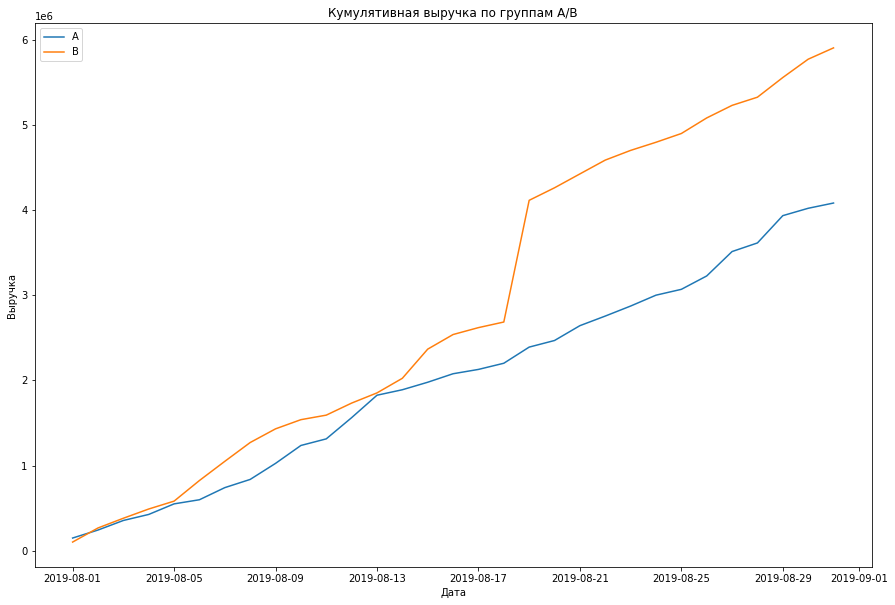

In [25]:
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

plt.figure(figsize=(15,10))

plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue'], label = 'A')

plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue'], label = 'B')

plt.title('Кумулятивная выручка по группам A/B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.legend() 
plt.show();

Большую часть выручки приносит группа B, и с течением времени именно по группе B выручка имеет наибольший рост. К концу периода разрыв между выручкой групп становится только больше. Но для обеих групп выручка растет на протяжении всего периода. В выручку группы B есть один резкий скачок, мог произойти всплеск числа заказов, или производились более дорогостоющие заказы

## Кумулятивный средний чек по группам

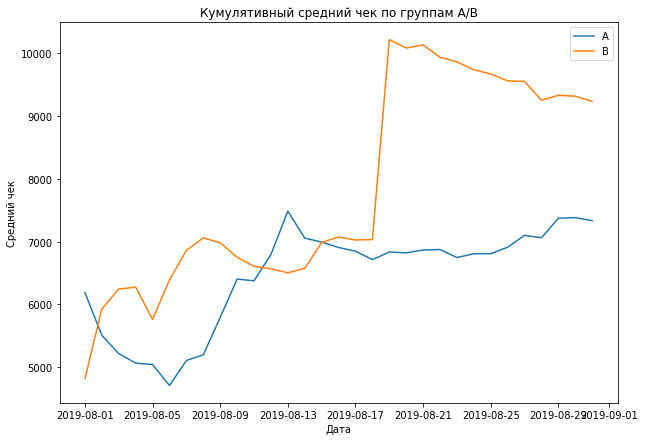

In [26]:
plt.figure(figsize=(10,7))

plt.plot(cummulativeDataA['date'], cummulativeDataA['revenue']/cummulativeDataA['orders'], label = 'A')

plt.plot(cummulativeDataB['date'], cummulativeDataB['revenue']/cummulativeDataB['orders'], label = 'B')

plt.title('Кумулятивный средний чек по группам A/B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend()
plt.show();

Разрыв в среднем чеке к концу периода также увеличивается, что как раз может свидетельствовать о том, что в определенный момент в группе B стали появляться более дорогие заказы, так как на графики со средним чеком также виден скачок в размере чека группы B

## Относительное изменение кумулятивного среднего чека группы B к группе A 

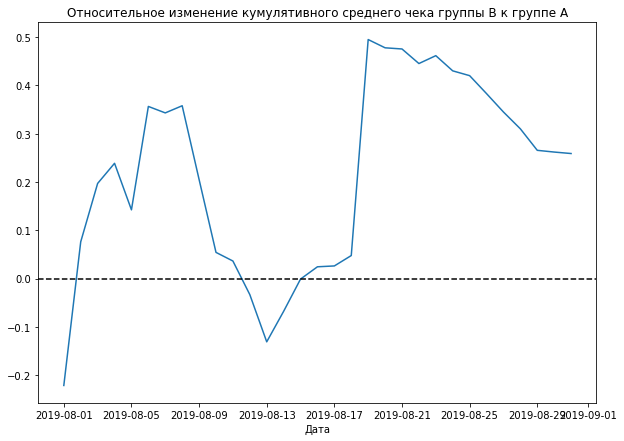

In [27]:
mergedCummulativeData = cummulativeDataA.merge(cummulativeDataB, left_on='date', right_on='date', suffixes=['A', 'B'])

plt.figure(figsize=(10,7))

plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['revenueB']/mergedCummulativeData['ordersB'])/(mergedCummulativeData['revenueA']/mergedCummulativeData['ordersA'])-1))

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle = '--')
plt.show();

В нескольких точках график различия между сегментами резко изменяется, то есть предположение об аномальных стоимостях заказов верно.

## Кумулятивное среднее количество заказов на посетителя по группам

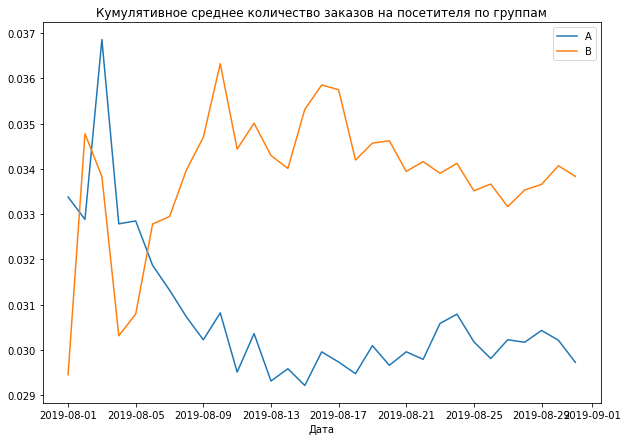

In [28]:
mergedCummulativeData['orders_to_usersA'] =  mergedCummulativeData['ordersA'] / mergedCummulativeData['visitorsA'] 

mergedCummulativeData['orders_to_usersB'] =  mergedCummulativeData['ordersB'] / mergedCummulativeData['visitorsB']

plt.figure(figsize=(10,7))

plt.plot(mergedCummulativeData['date'], mergedCummulativeData['orders_to_usersA'], label='A')

plt.plot(mergedCummulativeData['date'], mergedCummulativeData['orders_to_usersB'], label='B')

plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.legend()
plt.show();

Среднее кол-во заказов из группы А в начале имеет резкое падение,а группа B на протяжении всего периода демонстрирует рост в кол-ве средних заказов.

## Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A

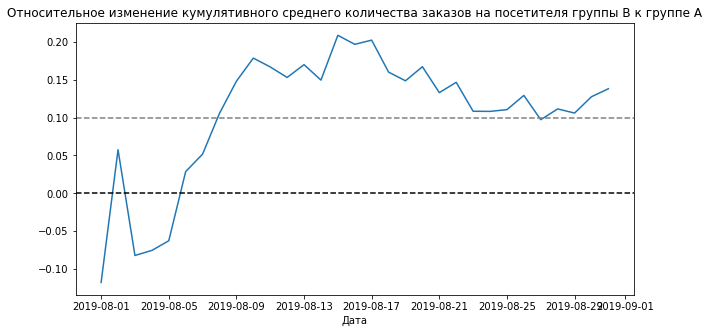

In [29]:
plt.figure(figsize=(10,5))

plt.plot(mergedCummulativeData['date'], ((mergedCummulativeData['orders_to_usersB']/mergedCummulativeData['orders_to_usersA'])-1))

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.show();

Кумулятивное среднее число заказов в группе B стабильно больше на 10%, чем в группе А

## Точечный график количества заказов по пользователям

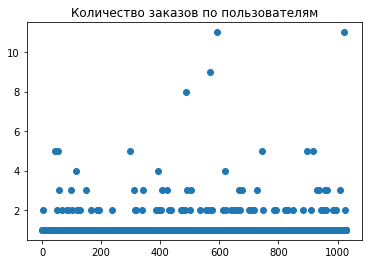

In [30]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique'})

ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.title('Количество заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show();

Из графика выше можно сделать вывод, что посетители сайта чаще всего совершают всего один заказ, данные по посетителям с кол-ом заказов больше одного - выбросы. 

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [31]:
percentiles = np.percentile(ordersByUsers['orders'], [95, 99])
print(percentiles)

[2. 4.]


***Больше 2 заказов совершают только 5% пользователей.*** То есть разумно выбрать 2 заказа на посетителя за верхнюю границу числа заказов, далее чистить данные по ней

## Точечный график стоимости заказов 

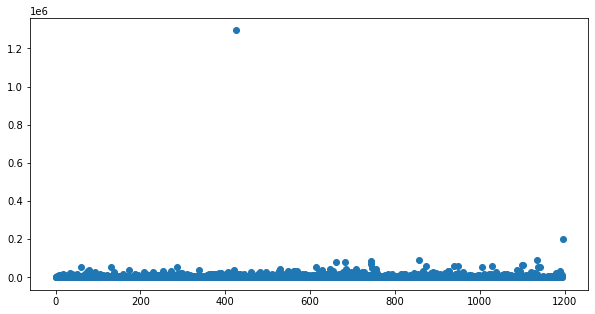

In [32]:
x_values = pd.Series(range(0, len(orders)))

plt.figure(figsize=(10,5))

plt.scatter(x_values, orders['revenue'])


По графику без ограничений по стоимости заказа видно, что все заказы, у которых стоимость выше примерно 40 тысяч, являются аномальными в для данного исследования.

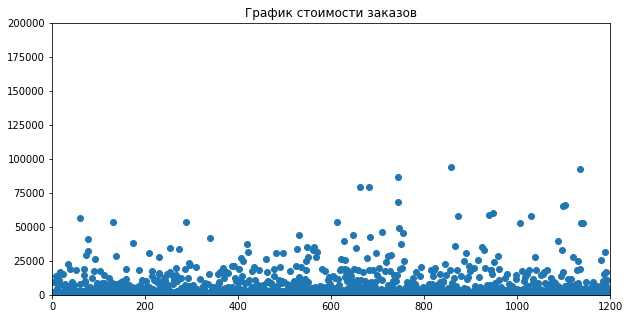

In [33]:
x_values = pd.Series(range(0, len(orders)))

plt.figure(figsize=(10,5))

plt.scatter(x_values, orders['revenue'])

plt.title('График стоимости заказов')
plt.axis([0, 1200, 0, 200000])
plt.show();

Как и предполагалось, большая часть заказов по стоимости находится в пределах примерно 25000

## Посчитаем 95-й и 99-й перцентили стоимости заказов

In [34]:
percentiles = np.percentile(orders['revenue'], [95, 99])

print(percentiles)

[28000.  58233.2]


***5% заказов дороже 28000 р***

## Статистическая значимость различий в среднем количестве заказов на посетителя

Подготовим "сырые" данные 

In [35]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 
ordersByUsersB

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


In [37]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [38]:
alpha = 0.05

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным

Выдвигается гипотеза 

***H0***: различий в среднем количестве заказов на посетителя между группами A и B по "сырым" данным нет.

***H1***: различия в среднем количестве заказов на посетителя между группами по "сырым" данным есть.

In [39]:
#Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя 
#между группами между группами по «сырым» данным

results = st.mannwhitneyu(sampleA, sampleB)

print('P-value:{0:.3f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное изменение среднего кол-ва заказов в группе B по отношению группы A:{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

if results.pvalue < alpha:
    print('Различия в среднем количестве заказов на посетителя между "сырыми" группами статистически значимы')
else:
    print('Различий в среднем количестве заказов на посетителя между "сырыми" группами нет')

P-value:0.017
Относительное изменение среднего кол-ва заказов в группе B по отношению группы A:0.138
Различия в среднем количестве заказов на посетителя между "сырыми" группами статистически значимы


Так как p-value меньше альфа, нулевую гипотезу мы отвергаем. Однако изменение среднего кол-ва заказов в группе B по отношению группы A равно 13.8%

## Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Выдвигается гипотеза 

***H0***: различий в среднем чеке между группами A и B по "сырым" данным нет.

***H1***: различия в среднем чеке между группами по "сырым" данным есть.

In [40]:
#посчитаем относительные различия в среднем чеке между группами

results_1 = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('P-value:{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('Относительное изменение среднего чека в группе B по отношению группы A:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

if results_1.pvalue < alpha:
    print('По "сырым" данным различия в средних чеках в группах A и B статистически значимы')
else:
    print('По "сырым" данным различий в средних чеках в группах A и B нет')

P-value:0.729
Относительное изменение среднего чека в группе B по отношению группы A: 0.259
По "сырым" данным различий в средних чеках в группах A и B нет


P-value больше альфа, следовательно мы принимаем нулевую гипотезу об отсутсвии различий в среднем чеке между группами по "сырым" данным

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным

In [41]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],\
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],],axis=0,)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

In [42]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],\
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
               name='orders',),],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],\
     pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)

In [43]:
results_2 = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

Выдвигается гипотеза 

***H0***: различий в среднем количестве заказов на посетителя между группами A и B по очищенным данным нет.

***H1***: различия в среднем количестве заказов на посетителя между группами по очищенным данным есть.

In [44]:
print('P-value:{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print('Относительное изменение среднего кол-ва заказов в группе B по отношению группы A:{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

if results_2.pvalue < alpha:
    print('По очищенным данным различия в среднем кол-ве заказов на посетителя в группах A и B статистически значимы')
else:
    print('По очищенным данным различий в среднем кол-ве заказов на посетителя в группах A и B нет')

P-value:0.013
Относительное изменение среднего кол-ва заказов в группе B по отношению группы A:0.173
По очищенным данным различия в среднем кол-ве заказов на посетителя в группах A и B статистически значимы


Так как p-value для очищенных данных немного уменьшилось в сравнении с этим показателем по сырым данным, нулевую гипотезу мы отвергаем. А изменение среднего кол-ва заказов в группе B по отношению группы A увеличилось до 17%

## Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Выдвигается гипотеза 

***H0***: различия в среднем чеке между группами A и B по очищенным данным статистически значимо.

***H1***: различия в среднем чеке между группами A и B по очищенным данным не является статистически значимым.

In [45]:
print('P-value:{0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
               np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],\
               orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].\
               isin(abnormalUsers)),)]['revenue'],)[1]))

print('Относительное изменение среднего чека в группе B по отношению группы A:','{0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B',\
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/\
                orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].\
                isin(abnormalUsers)),)]['revenue'].mean()- 1)) 

if results_2.pvalue < alpha:
    print('По очищенным данным различия в среднем чеке заказа в группах A и B статистически значимы')
else:
    print('По очищенным данным различий в среднем чеке заказа на посетителя в группах A и B нет')

P-value:0.738
Относительное изменение среднего чека в группе B по отношению группы A: -0.020
По очищенным данным различия в среднем чеке заказа в группах A и B статистически значимы


P-value немного увеличилось, следовательно мы принимаем нулевую гипотезу об отсутсвии различий в среднем чеке между группами по уже очищенным данным. 
После очистки данных разница в среднем чеке между группами стала минимальной

# Вывод

По первой части: 

В ходе приоритизации гипотез был сделан вывод, что наиболее важными являются гипотезы под номерами 7, 0 и 2, такой вывод был получен благодаря использованию RICE. Он немного отличается от вывода после использования ICE, но мы опираемся на итог по RICE, так как он учитывает еще и охват.

По второй части: 

Кумулятивные данные по выручке, среднему чеку и кол-ве заказов на посетителя почти все время лидировали в группе B. Изучая графики были заметны резких колебаний в кумулятивном среднем чеке в группе B, после чего было выдвинуто предположение о присутствии аномальных значений. Данные были очищены, после этого разница между средними чеками сократилась, что видно из вывода в пункте 2.15. 
До и после очистки данных, показатель отношения кол-ва заказов к посетителям в группе B больше данного показателя в группе A, он увеличился с 13.8 до 17.3. Такое изменение показателей пользволяет прийти к выводу, что тест можно остановить и зафиксировать победу группы B.